# INFO 370 PS6
*Name: Brian Park*

List your collaborators here:
1. Jae Sang Woo

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## 1. Who will win the elections?

1. (1pt) Load data, and do the basic checks. You are going to work with 2020 data. However, some important information for 2020 is missing. First, we check how does missing data look like, and thereafter we fill it with the most recent values that are there.
2. (3pt) print out lines 6264–6271 (i.e. these index values of the data frame). For simplicity, let’s look only at variables fips, county, year and income. You can select certain df lines using .loc[] attribute, see Python Notes 3.3.4.
3. (3pt) You see that for a number of cases here, income is missing. Explain, how would you fill in the income. Which values do you expect to see instead of NA-s in lines 6266, 6267, 6268 and 6269?
4. (7pt) Fill the missings with the most recent values that exist in the data. Ensure you do this right and do not fill missings with values from other counties. Hint: check out DataFrame.fillna method.
5. (3pt) Print out the same lines you did above in 1.2. Does it look now what you expected? Hint: If you did this correctly, then even after filling in NA-s there are a few missing cases left. Now it is time to select the neccesary data and create the features you need for the analysis below.
6. (10pt) Make a new data frame that only contains 2020 data, and that contains a binary variable: the democrats won in that county in 2020. Hint: You have to build that variable using two lines of data in the original data frame by FIPS after the data is ordered by year. The original data contains two lines for each county, one for democrats and one for republicans. They contain the party-specific number of votes but are otherwise similar. You may extract the rows for democrats, the rows for republicans, and then just compare these two rows county-wise to see who won there. Note that it is not enough to just check if democrats/republicans got more than 50% of votes. However, when you extract the vote numbers, it will be a series with an index. You may want to either reset the index (see examples in Combining data into data frames) in Python Notes, or convert the series into a numpy array with the .values attribute.
7. (6pt) Create auxiliary variables: population density (population divided by land area); and percentage of college graduates. These can be made of different variables, and as none of these are changing fast, it should not have much of an impact.
8. (4pt) But are “younger” counties with more births voting differently that “old” counties with a lots of deaths? Compute (estimate) yearly birth rate and death rate as number of births per 1000 of population.
9. (2pt) Ensure that the variables you are going to use are in a reasonable range! Hint: there are values that do not make sense. Use min and max to check what is the range in data, and then find offending values and remove those.
10. (8pt) Estimate logistic regression model where you explain democrats’ winning with population density, education level, income, and census region.
11. (5pt) Why do we use logistic regression here, instead of linear regression?
12. (8pt) Interpret the results. Which results are statistically significant?

In [376]:
#1-1
elec = pd.read_csv("../data/us-elections_2000-2020.csv.bz2", sep="\t")
elec.head()

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,BIRTHS2020,DEATHS2020,region
0,1001,2000,Alabama,AL,Autauga,President,Al Gore,democrat,4942.0,17208,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south
1,1001,2000,Alabama,AL,Autauga,President,George W. Bush,republican,11993.0,17208,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south
2,1001,2004,Alabama,AL,Autauga,President,John Kerry,democrat,4758.0,20081,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south
3,1001,2004,Alabama,AL,Autauga,President,George W. Bush,republican,15196.0,20081,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south
4,1001,2008,Alabama,AL,Autauga,President,Barack Obama,democrat,6093.0,23641,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south


In [377]:
#1-1
elec.isna().sum()

FIPS                 0
year                 0
state                0
state2               0
county               0
office               0
candidate            0
party                0
candidatevotes       4
totalvotes           0
income            6762
population        6762
LND010200D           0
EDU695209D           0
EDU600209D           0
POP010210D           0
POP220210D           0
POP250210D           0
POP320210D           0
POP400210D           0
PST110209D           0
BIRTHS2020          20
DEATHS2020          20
region               0
dtype: int64

In [378]:
#1-1
elec.shape

(37390, 24)

In [379]:
#1-2
print(elec.loc[6264:6271, ['FIPS', 'county', 'year', 'income']])

       FIPS        county  year   income
6264  15007         Kauai  2016  44958.0
6265  15007         Kauai  2016  44958.0
6266  15007  Kauai County  2020      NaN
6267  15007  Kauai County  2020      NaN
6268  15009          Maui  2000      NaN
6269  15009          Maui  2000      NaN
6270  15009          Maui  2004      NaN
6271  15009          Maui  2004      NaN


In [380]:
#1-3

Since the most recent year before 2020 is 2016, I would fill the income in 2020 with the value in 2016. However, all the income values in Maui are missing. I expect 44958.0 for line 6266 and 6277 whereas N/A for line 6268 and 6269.

In [381]:
#1-4
newElec = elec.copy()
newElec = newElec.fillna(method ='ffill', limit = 2)

In [382]:
#1-5
print(newElec.loc[6264:6271, ['FIPS', 'county', 'year', 'income']])

       FIPS        county  year   income
6264  15007         Kauai  2016  44958.0
6265  15007         Kauai  2016  44958.0
6266  15007  Kauai County  2020  44958.0
6267  15007  Kauai County  2020  44958.0
6268  15009          Maui  2000      NaN
6269  15009          Maui  2000      NaN
6270  15009          Maui  2004      NaN
6271  15009          Maui  2004      NaN


Yes, it looks like what I expected that incomes in Kauai county are filled with their most recent ones whereas Maui's incomes are still NaN.

In [383]:
#1-6
elec2020 = newElec[newElec.year == 2020].reset_index(drop = True)
demo2020 = elec2020[elec2020.party == "democrat"]
rep2020 = elec2020[elec2020.party == "republican"]

demoVotes = demo2020.reset_index(drop=True).candidatevotes
repVotes = rep2020.reset_index(drop=True).candidatevotes

temp = pd.concat([demoVotes, repVotes], axis = 1).reset_index()
temp["D"] = np.where(temp.iloc[:, 1] < temp.iloc[:, 2], 0, 1)
temp = temp.iloc[np.arange(len(temp)).repeat(2)].reset_index(drop = True)
temp.head(6)

,index,candidatevotes,candidatevotes,D
0,0,7503.0,19838.0,0
1,0,7503.0,19838.0,0
2,1,24578.0,83544.0,0
3,1,24578.0,83544.0,0
4,2,4816.0,5622.0,0
5,2,4816.0,5622.0,0


In [384]:
#1-6
elec2020["D"] = temp["D"]
elec2020 = elec2020[elec2020.party == "democrat"]

elec2020.head()

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,BIRTHS2020,DEATHS2020,region,D
1,1001,2020,Alabama,AL,Autauga County,President,Joshep Biden,democrat,7503.0,27770,...,54571,42855,9643,474,1310,7085,143.0,168.0,south,0
3,1003,2020,Alabama,AL,Baldwin County,President,Joshep Biden,democrat,24578.0,109679,...,182265,156153,17105,1348,7992,39463,527.0,661.0,south,0
5,1005,2020,Alabama,AL,Barbour County,President,Joshep Biden,democrat,4816.0,10518,...,27457,13180,12875,107,1387,699,64.0,109.0,south,0
7,1007,2020,Alabama,AL,Bibb County,President,Joshep Biden,democrat,1986.0,9595,...,22915,17381,5047,22,406,1698,62.0,90.0,south,0
9,1009,2020,Alabama,AL,Blount County,President,Joshep Biden,democrat,2640.0,27588,...,57322,53068,761,117,4626,7323,152.0,220.0,south,0


In [385]:
#1-7
elec2020["pden"] = elec2020.population / elec2020.LND010200D
elec2020.pden

1        91.393829
3       102.421396
5        28.530049
7        36.070653
9        88.370735
           ...    
6213      4.215164
6215      5.503340
6217      9.907260
6219      3.640620
6221      3.008246
Name: pden, Length: 3111, dtype: float64

In [386]:
#1-7
elec2020["gperc"] = elec2020.EDU695209D * 100 / elec2020.EDU600209D
elec2020.gperc

1        7.261114
3        9.153772
5        5.295336
7        3.202429
9        4.057496
          ...    
6213     4.686860
6215    15.193734
6217     5.181432
6219     8.346273
6221     3.332621
Name: gperc, Length: 3111, dtype: float64

In [387]:
#1-8
elec2020["brate"] = elec2020.BIRTHS2020 * 1000 * 4 / elec2020.population
elec2020["drate"] = elec2020.DEATHS2020 * 1000 * 4 / elec2020.population
elec2020.brate, elec2020.drate

(1       10.354253
 3       10.154094
 5        9.920174
 7       10.980253
 9       10.575017
           ...    
 6213    10.130704
 6215     7.575105
 6217     9.670245
 6219     8.818126
 6221     8.864266
 Name: brate, Length: 3111, dtype: float64,
 1       12.164437
 3       12.735969
 5       16.895296
 7       15.939077
 9       15.305945
           ...    
 6213    10.492515
 6215     4.992683
 6217     9.476840
 6219    15.676669
 6221     7.756233
 Name: drate, Length: 3111, dtype: float64)

In [388]:
#1-9
np.min(elec2020.pden), np.max(elec2020.pden), np.min(elec2020.gperc), \
np.max(elec2020.gperc), np.min(elec2020.income), np.max(elec2020.income)

(0.17285957006722316, inf, 0.0, 38.4636488340192, 18183.0, 205843.0)

In [389]:
#1-9
elec2020.replace([np.inf], np.nan, inplace=True)
np.min(elec2020.pden), np.max(elec2020.pden)

(0.17285957006722316, 48428.87177968611)

In [390]:
#1-10
elec2020["pden"] = elec2020["pden"] / 1000
m = smf.logit("D ~ region + pden + gperc + income", data = elec2020).fit()
m.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.305261
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      D
Method:                          dydx
At:                           overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
region[T.northeast]     0.1151      0.020      5.888      0.000       0.077       0.153
region[T.south]         0.0546      0.015      3.708      0.000       0.026       0.083
region[T.west]          0.1349      0.017      8.145      0.000       0.102       0.167
pden                    0.2189      0.022      9.805      0.000       0.175       0.263
gperc                   0.0252      0.002     13.493      0.000       0.022       0.029
income              -2.382e-06   6.41e-07     -3.717      0.000   -3.64e-06   -1.13e-06
=======================================================================================
"""

In [391]:
#1-11

The reason we use logistic regression instead of linear regression is because our first task is to analyze whether or not democrats won the election. In other words, we are dealing with categorical variables as response variables. The categorical variable we try to analyze only contains two options, 0 or 1, whether the democrats lost or won the election.

In [392]:
#1-12

All the results shown above are statistically significant since their P value is 0 and less than 0.05.

In [393]:
#1-12-T.northeast

Democratic candidates in the northeast census region have 11.51 pct pt more chance to win the election than in the midwest census region.

In [394]:
#1-12-T.south

Democratic candidates in the south census region have 5.46 pct pt more chance to win the election than in the midwest census region.

In [395]:
#1-12-T.west

Democratic candidates in the west census region have 13.49 pct pt more chance to win the election than in the midwest census region.

In [396]:
#1-12-population density

Counties with one unit higher population density have 21.89 pct pt more chance to win the election for democratic candidates.

In [397]:
#1-12-education level

Counties with one unit higher education level have 2.52 pct pt more chance to win the election for democratic candidates.

In [398]:
#1-12-income

Counties with one unit higher personal income have 0.0002382 pct pt more chance to win the election for democratic candidates.

## 2. Model AirBnB Price

1. (2pt) Load data. Select only relevant variables you need below. Even better, check out the usecols argument for read_csv. Do basic checks.
2. (5pt) Do the basic data cleaning: (a) convert price to numeric. (b) remove entries with missing or invalid price, bedrooms, and other variables you need below
3. (4pt) Analyze the distribution of price. Does it look like normal? Does it look like something else? Does it suggest you should do a log-transformation? Hint: consult lecture notes Section 4.1.8 Interactions and Feature Transformations.
4. (6pt) Convert the number of bedrooms into another variable with a limited number of categories only, such as 0, 1, 2, 3, 4+, and use these categories in the models below. Hint: consult Python Notes Section on cleaning data.
5. (6pt) Run a linear regression where you explain the listing price with number of bedrooms where bedrooms uses these categories. Interpret the results, including R2. Hint: if 0-BR is the reference category, the effect for 1BR should be -11.62 (but it depends on how exactly did you clean data).
6. (8pt) Now repeat the process with the model where you analyze log price instead of price. Interpret the results. Which model behaves better in the sense of R 2 ? Hint: if you cleaned the data the same way as me, you should see R2 = 0.32. For the following task use either log(price) or price, depending on your answer here.
7. (9pt) Finally we just add three more variables to the model: room type, accommodates, and bathrooms. While room type only contains three values, the other two contain many different categories. Recode these as • accommodates: “1”, “2”, “3”, “4 and more” • bathrooms: “0”, “1”, “2”, “3 and more”, where the 0.5 is rounded up to the next integer, e.g. 0.5 becomes 1, and 1.5 becomes 2. Run this model. Interpret and comment the more interesting/important results. Do not forget to mention what are the relevant reference categories and R2

In [399]:
#2-1
airbnb = pd.read_csv("../data/airbnb-beijing-listings.csv.bz2", 
                     usecols=["price", "room_type", "accommodates", 
                              "bathrooms", "bedrooms"])
airbnb.head()

,room_type,accommodates,bathrooms,bedrooms,price
0,Entire home/apt,9,2.0,3.0,$831.00
1,Private room,2,1.0,1.0,"$1,197.00"
2,Entire home/apt,2,1.0,1.0,$598.00
3,Entire home/apt,2,1.0,1.0,$598.00
4,Entire home/apt,2,1.0,1.0,$598.00


In [400]:
#2-1
airbnb.isna().sum()

room_type         0
accommodates      0
bathrooms         7
bedrooms        114
price             0
dtype: int64

In [401]:
#2-1
airbnb.shape

(38814, 5)

In [402]:
#2-2
airbnb.price = airbnb.price.replace("[$,]", "", regex = True)
airbnb.price = pd.to_numeric(airbnb.price, errors = 'ignore')
airbnb = airbnb.dropna(subset=["bathrooms", "bedrooms"])
airbnb = airbnb[airbnb['price'] > 0]
airbnb.head()

,room_type,accommodates,bathrooms,bedrooms,price
0,Entire home/apt,9,2.0,3.0,831.0
1,Private room,2,1.0,1.0,1197.0
2,Entire home/apt,2,1.0,1.0,598.0
3,Entire home/apt,2,1.0,1.0,598.0
4,Entire home/apt,2,1.0,1.0,598.0


In [403]:
#2-2
airbnb.shape

(38686, 5)

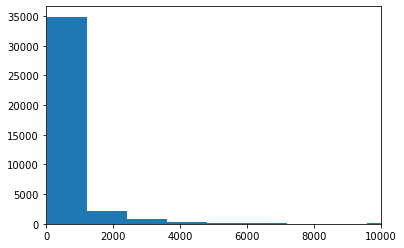

In [404]:
#2-3
_ = plt.hist(airbnb.price, bins = 60)
_ = plt.xlim([0, 10000])

The data is concentrated at the highest peak, making it not look like a normal distribution. Therefore, it suggests that we should do a log transformation instead.

In [405]:
#2-4
airbnb["bedrooms2"] = pd.cut(airbnb.bedrooms,
                      bins = [0, 1, 2, 3, 4, np.inf],
                      labels = ["0", "1", "2", "3", "4+"],
                      right = False)
airbnb.head()

,room_type,accommodates,bathrooms,bedrooms,price,bedrooms2
0,Entire home/apt,9,2.0,3.0,831.0,3
1,Private room,2,1.0,1.0,1197.0,1
2,Entire home/apt,2,1.0,1.0,598.0,1
3,Entire home/apt,2,1.0,1.0,598.0,1
4,Entire home/apt,2,1.0,1.0,598.0,1


In [406]:
#2-5
m = smf.ols("price ~ bedrooms2", data=airbnb).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1093.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        07:15:13   Log-Likelihood:            -3.4133e+05
No. Observations:               38686   AIC:                         6.827e+05
Df Residuals:                   38681   BIC:                         6.827e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         448.8851    107.166      4.189      0.000     238.837     658.933
bedrooms2[T.1]    -11.6223    107.655     -0.108      0.914    -222.628     199.384
bedrooms2[T.2]    295.9590    108.801      2.720      0.007      82.705     509.213
bedrooms2[T.3]    746.0202    111.966      6.663      0.000     526.565     965.476
bedrooms2[T.4+]  2167.8388    111.995     19.357      0.000    1948.326    2387.352
==============================================================================
Omnibus:                    95843.461   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1539629661.103
Skew:                          26.864   Prob(JB):                         0.00
Kurtosis:                     978.842   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R2 is 0.102, interpreting that it has a 10.2% of explanatory validity in the response variable explained by the regression model.

In [407]:
#2-5-β0

The price for rooms without a bedroom is $448.8851.

In [408]:
#2-5-T1

The price of rooms with one bedroom is $11.6223 cheaper than rooms without bedrooms.

In [409]:
#2-5-T2

The price of rooms with two bedrooms is $295.9590 more expensive than rooms without bedrooms.

In [410]:
#2-5-T3

The price of rooms with three bedrooms is $746.0202 more expensive than rooms without bedrooms.

In [411]:
#2-5-T4+

The price of rooms with more than three bedrooms is $2167.8388 more expensive than rooms without bedrooms.

In [412]:
#2-6
l = smf.ols("np.log(price) ~ bedrooms2", data=airbnb).fit()
l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     4562.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        07:15:13   Log-Likelihood:                -40076.
No. Observations:               38686   AIC:                         8.016e+04
Df Residuals:                   38681   BIC:                         8.020e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.8117      0.044    130.662      0.000       5.724       5.899
bedrooms2[T.1]     -0.0323      0.045     -0.724      0.469      -0.120       0.055
bedrooms2[T.2]      0.5306      0.045     11.749      0.000       0.442       0.619
bedrooms2[T.3]      0.9396      0.046     20.219      0.000       0.848       1.031
bedrooms2[T.4+]     1.5931      0.046     34.272      0.000       1.502       1.684
==============================================================================
Omnibus:                     3876.704   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16891.857
Skew:                           0.418   Prob(JB):                         0.00
Kurtosis:                       6.128   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model analyzing log(price) has a better R2 value. R2 value with log(price) is about 0.321 whereas R2 value with the price is 0.102. The model with log(price) has a higher explanatory validity in the response variable explained by the regression model.

In [413]:
#2-6-β0

The unconditional expected mean of log(price) of rooms with no bedrooms is 5.8117.

In [414]:
#2-6-T1

The price of rooms with one bedroom is 3.23% less expensive than rooms without bedrooms.

In [415]:
#2-6-T2

The price of rooms with two bedrooms is 53.06% more expensive than rooms without bedrooms.

In [416]:
#2-6-T3

The price of rooms with three bedrooms is 93.96% more expensive than rooms without bedrooms.

In [417]:
#2-6-T4+

The price of rooms with more than three bedrooms is 159.31% more expensive than rooms without bedrooms.

In [418]:
#2-7
airbnb["accommodates2"] = pd.cut(airbnb.accommodates,
                      bins = [1, 2, 3, 4, np.inf],
                      labels = ["1", "2", "3", "4 and more"],
                      right = False)

airbnb["bathrooms2"] = pd.cut(airbnb.bathrooms,
                      bins = [-np.inf, 0.5, 1.5, 2.5, np.inf],
                      labels = ["0", "1", "2", "3 and more"],
                      right = False)

In [419]:
#2-7
m = smf.ols("np.log(price) ~ room_type + accommodates2 + \
            bathrooms2 + bedrooms2", data=airbnb).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2709.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        07:15:13   Log-Likelihood:                -35751.
No. Observations:               38686   AIC:                         7.153e+04
Df Residuals:                   38673   BIC:                         7.164e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       5.5770      0.062     90.051      0.000       5.456       5.698
room_type[T.Private room]      -0.3243      0.007    -43.838      0.000      -0.339      -0.310
room_type[T.Shared room]       -0.9453      0.017    -56.064      0.000      -0.978      -0.912
accommodates2[T.2]              0.3298      0.013     24.452      0.000       0.303       0.356
accommodates2[T.3]              0.3921      0.017     23.543      0.000       0.359       0.425
accommodates2[T.4 and more]     0.6066      0.015     39.175      0.000       0.576       0.637
bathrooms2[T.1]                 0.0049      0.047      0.106      0.916      -0.087       0.097
bathrooms2[T.2]                 0.0386      0.047      0.819      0.413      -0.054       0.131
bathrooms2[T.3 and more]        0.5938      0.049     12.017      0.000       0.497       0.691
bedrooms2[T.1]                  0.0558      0.040      1.395      0.163      -0.023       0.134
bedrooms2[T.2]                  0.1898      0.041      4.632      0.000       0.110       0.270
bedrooms2[T.3]                  0.4926      0.042     11.633      0.000       0.410       0.576
bedrooms2[T.4+]                 0.8730      0.044     19.909      0.000       0.787       0.959
==============================================================================
Omnibus:                     9116.538   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54083.795
Skew:                           1.003   Prob(JB):                         0.00
Kurtosis:                       8.434   Cond. No.                         52.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results having a t value less than 1.96 such as `bathrooms2[T.1]`, `bathrooms2[T.2]`, and `bedrooms2[T.1]` are not statistically significant. By adding more variables to the model, it showed an improvement in its R2 value. Now, R2 is 0.457, interpreting that it has a 45.7% of explanatory validity in the response variable explained by the regression model, better in R2 compared to previous models.

The model shows that adding more accommodates, bathrooms, or bedrooms consistently increases the price of rooms. However, adding more people in rooms to make them share drops the price to save them money. All these observations make sense in real life, so the data was properly cleaned and used in this regression model.

#### Finally, tell us how many hours did you spend on this PS.

I spent almost 12 hours finishing this PS. I think this PS was the hardest one so far.